<a href="https://colab.research.google.com/github/venomeh/Financial-Analysis-Automation/blob/main/Financial_Analysis_%26_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eodhd yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.7 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import json

In [3]:
from eodhd import APIClient
import pandas as pd

In [4]:
def get_stock_info(symbol: str) -> dict:
    """
    Retrieves and formats detailed information about a stock from Yahoo Finance.

    Args:
        symbol (str): The stock ticker symbol to look up.

    Returns:
        dict: A dictionary containing detailed stock information, including ticker, name,
              business summary, city, state, country, industry, and sector.
    """
    data = yf.Ticker(symbol)
    stock_info = data.info

    properties = {
        "Ticker": stock_info.get('symbol', 'Information not available'),
        'Name': stock_info.get('longName', 'Information not available'),
        'Business Summary': stock_info.get('longBusinessSummary'),
        'City': stock_info.get('city', 'Information not available'),
        'State': stock_info.get('state', 'Information not available'),
        'Country': stock_info.get('country', 'Information not available'),
        'Industry': stock_info.get('industry', 'Information not available'),
        'Sector': stock_info.get('sector', 'Information not available')
    }

    return properties

In [5]:
def get_company_tickers():
    """
    Downloads and parses the Stock ticker symbols from the GitHub-hosted SEC company tickers JSON file.

    Returns:
        dict: A dictionary containing company tickers and related information.

    Notes:
        The data is sourced from the official SEC website via a GitHub repository:
        https://raw.githubusercontent.com/team-headstart/Financial-Analysis-and-Automation-with-LLMs/main/company_tickers.json
    """
    # URL to fetch the raw JSON file from GitHub
    url = "https://raw.githubusercontent.com/team-headstart/Financial-Analysis-and-Automation-with-LLMs/main/company_tickers.json"

    # Making a GET request to the URL
    response = requests.get(url)

    # Checking if the request was successful
    if response.status_code == 200:
        # Parse the JSON content directly
        company_tickers = json.loads(response.content.decode('utf-8'))

        # Optionally save the content to a local file for future use
        with open("company_tickers.json", "w", encoding="utf-8") as file:
            json.dump(company_tickers, file, indent=4)

        print("File downloaded successfully and saved as 'company_tickers.json'")
        return company_tickers
    else:
        print(f"Failed to download file. Status code: {response.status_code}")
        return None

In [ ]:
company_tickers = get_company_tickers()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
NameError: name 'requests' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
AssertionError
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

In [6]:
api = APIClient("API")

In [7]:
resp = api.get_eod_historical_stock_market_data(symbol = 'NVDA', period='d', from_date = '2024-06-29', order='a') # this will give the latest data
print(resp)

[{'date': '2024-07-01', 'open': 123.47, 'high': 124.84, 'low': 118.83, 'close': 124.3, 'adjusted_close': 124.2808, 'volume': 284885500}, {'date': '2024-07-02', 'open': 121.13, 'high': 123.41, 'low': 121.03, 'close': 122.67, 'adjusted_close': 122.6511, 'volume': 218374000}, {'date': '2024-07-03', 'open': 121.66, 'high': 128.28, 'low': 121.36, 'close': 128.28, 'adjusted_close': 128.2602, 'volume': 215748984}, {'date': '2024-07-05', 'open': 127.38, 'high': 128.85, 'low': 125.68, 'close': 125.83, 'adjusted_close': 125.8106, 'volume': 214176703}, {'date': '2024-07-08', 'open': 127.49, 'high': 130.77, 'low': 127.04, 'close': 128.2, 'adjusted_close': 128.1802, 'volume': 237677297}, {'date': '2024-07-09', 'open': 130.35, 'high': 133.82, 'low': 128.65, 'close': 131.38, 'adjusted_close': 131.3597, 'volume': 287020812}, {'date': '2024-07-10', 'open': 134.03, 'high': 135.1, 'low': 132.42, 'close': 134.91, 'adjusted_close': 134.8892, 'volume': 248978594}, {'date': '2024-07-11', 'open': 135.75, 'hig

In [8]:
# import json

# # Load the JSON file
# with open('company_tickers.json', 'r') as file:
#     data = json.load(file)

# # Initialize an empty list to store the tickers
# tickers = []

# # Iterate through the first 10 items and collect their tickers
# for i in range(10):
#     tickers.append(data[str(i)]['ticker'])


# # Print the tickers list
# print(tickers)


In [9]:
# resp = api.get_eod_historical_stock_market_data(symbol = 'BRK-B', period='d', from_date = '2024-06-29', to_date = '2024-08-15', order='a')
# print(resp)

In [10]:
# for ticker in tickers:
#     resp = api.get_eod_historical_stock_market_data(symbol = ticker,period='d', from_date = '2024-06-29', to_date = '2024-08-15', order='a' )
#     print(resp)

In [11]:
import requests

url = f'https://eodhd.com/api/news?s=AAPL.US&offset=0&limit=10&api_token=token&fmt=json'
data = requests.get(url).json()

print(data)

[{'date': '2024-12-07T00:28:00+00:00', 'title': 'CFPB Moves to Supervise Google Payments Under New Rules', 'content': 'The Consumer Financial Protection Bureau said it determined that the platform meets the legal requirements for supervision under new rules.\n\nContinue reading\n\nView comments', 'link': 'https://finance.yahoo.com/m/4951b614-1b08-307a-bf56-fb4abf21e3bf/cfpb-moves-to-supervise.html', 'symbols': ['0R2V.IL', '0RIH.IL', '0RIH.LSE', '1GOOG.MI', '1GOOGL.MI', '2PP.F', '2PP.STU', '2PP.XETRA', '2PP0.F', 'AAPL.BA', 'AAPL.MX', 'AAPL.NEO', 'AAPL.SN', 'AAPL.US', 'AAPL34.SA', 'ABE0.F', 'ABEA.F', 'ABEA.STU', 'ABEA.XETRA', 'ABEC.F'], 'tags': [], 'sentiment': {'polarity': 0.44, 'neg': 0, 'neu': 0.849, 'pos': 0.151}}, {'date': '2024-12-05T00:00:00+00:00', 'title': "Here's Why Warren Buffett and Berkshire Hathaway May Change Their Investing Strategy With Donald Trump as President", 'content': "Here's Why Warren Buffett and Berkshire Hathaway May Change Their Investing Strategy With Donal

In [12]:
df = api.get_eod_historical_stock_market_data(symbol = 'NVDA',period='d', from_date = '2022-06-29', order='a')

In [13]:
print(df)

[{'date': '2023-12-08', 'open': 465.95, 'high': 477.4085, 'low': 465.5, 'close': 475.06, 'adjusted_close': 47.4925, 'volume': 359223666}, {'date': '2023-12-11', 'open': 474.91, 'high': 475.31, 'low': 458.3, 'close': 466.27, 'adjusted_close': 46.6138, 'volume': 509728085}, {'date': '2023-12-12', 'open': 460.46, 'high': 476.66, 'low': 460.46, 'close': 476.57, 'adjusted_close': 47.6435, 'volume': 372386876}, {'date': '2023-12-13', 'open': 476.29, 'high': 485.94, 'low': 476.08, 'close': 480.88, 'adjusted_close': 48.0744, 'volume': 447791906}, {'date': '2023-12-14', 'open': 483.9, 'high': 486.7, 'low': 474.22, 'close': 483.5, 'adjusted_close': 48.3363, 'volume': 391231676}, {'date': '2023-12-15', 'open': 481.94, 'high': 494.04, 'low': 481.2, 'close': 488.9, 'adjusted_close': 48.8761, 'volume': 479947615}, {'date': '2023-12-18', 'open': 494, 'high': 504.3299, 'low': 491.5, 'close': 500.77, 'adjusted_close': 50.0628, 'volume': 412587186}, {'date': '2023-12-19', 'open': 494.24, 'high': 497, 'l

In [14]:
df_of_data = pd.DataFrame(df)
df_of_data.to_csv('NVDA.csv')

In [15]:
df_of_data.head()

,date,open,high,low,close,adjusted_close,volume,warning
0,2023-12-08,465.95000000,477.40850000,465.50000000,475.06000000,47.49250000,359223666,NaN
1,2023-12-11,474.91000000,475.31000000,458.30000000,466.27000000,46.61380000,509728085,NaN
2,2023-12-12,460.46000000,476.66000000,460.46000000,476.57000000,47.64350000,372386876,NaN
3,2023-12-13,476.29000000,485.94000000,476.08000000,480.88000000,48.07440000,447791906,NaN
4,2023-12-14,483.90000000,486.70000000,474.22000000,483.50000000,48.33630000,391231676,NaN


In [16]:
df_of_data.tail()

,date,open,high,low,close,adjusted_close,volume,warning
246,2024-12-02,138.83000000,140.45000000,137.82500000,138.63000000,138.62040000,171682797,NaN
247,2024-12-03,138.26000000,140.54000000,137.95000000,140.26000000,140.25030000,164414000,NaN
248,2024-12-04,141.99500000,145.79000000,140.29000000,145.14000000,145.13000000,231224297,NaN
249,2024-12-05,145.11000000,146.54000000,143.95000000,145.06000000,145.06000000,172621203,NaN
250,2024-12-06,144.60000000,145.70000000,141.31000000,142.44000000,142.44000000,188505573,Data is limited by one year as you have free s...


In [17]:
# import pandas_datareader as pdr
# import pandas as pd
# import json
# tiingo_key = "key"

In [18]:
df_of_data_target_col = df_of_data['close']
df_of_data_target_col.head()

,close
0,475.06000000
1,466.27000000
2,476.57000000
3,480.88000000
4,483.50000000


In [19]:
df_of_data_target_col.shape

(251,)

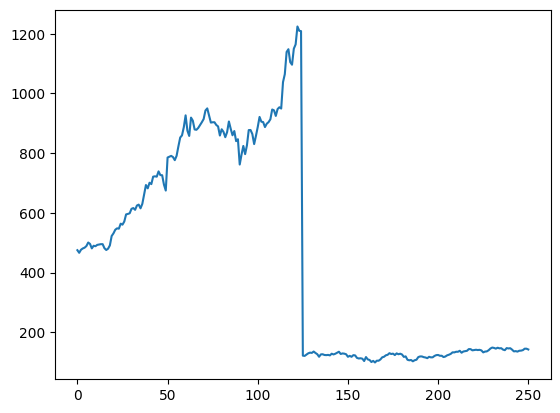

In [20]:
import matplotlib.pyplot as plt
plt.plot(df_of_data_target_col)



# > LSTM are sensitive to scale of data so we apply minmax scaler



In [21]:
import numpy as np

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_of_data_target_col = scaler.fit_transform(np.array(df_of_data_target_col).reshape(-1,1))

In [23]:
df_of_data_target_col.shape

(251, 1)

In [24]:
df_of_data_target_col

array([[0.33420999],
       [0.32640006],
       [0.33555163],
       [0.33938107],
       [0.34170894],
       [0.34650685],
       [0.35705337],
       [0.35285076],
       [0.33958543],
       [0.34739536],
       [0.34597375],
       [0.34996313],
       [0.35118926],
       [0.35212219],
       [0.35212219],
       [0.34009187],
       [0.33476974],
       [0.33858142],
       [0.34834605],
       [0.37638717],
       [0.38426819],
       [0.39501906],
       [0.39921279],
       [0.39821767],
       [0.41307342],
       [0.41015025],
       [0.41951506],
       [0.44069694],
       [0.4421452 ],
       [0.44409102],
       [0.45732081],
       [0.45958649],
       [0.45437987],
       [0.46712099],
       [0.46986646],
       [0.45878684],
       [0.47211437],
       [0.49995113],
       [0.52813441],
       [0.51828093],
       [0.53494922],
       [0.53087988],
       [0.55302135],
       [0.55404313],
       [0.55297693],
       [0.56872118],
       [0.55768607],
       [0.557

In [25]:
training_size = int(len(df_of_data_target_col)*0.60)

test_size = len(df_of_data_target_col) - training_size

train_data, test_data = df_of_data_target_col[0:training_size,:], df_of_data_target_col[training_size:len(df_of_data_target_col),:1]

In [26]:
training_size, test_size

(150, 101)

In [27]:
import numpy as np

In [28]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]

    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset [ i+time_step , 0 ] )
    return np.array(dataX), np.array(dataY)

In [94]:
time_step = 5
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [95]:
X_train.shape

(144, 5)

In [96]:
Y_train.shape

(144,)

In [97]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [99]:
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 5, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.3381 - val_loss: 2.8408e-04
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2631 - val_loss: 0.0032
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2025 - val_loss: 0.0124
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1261 - val_loss: 0.0342
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0562 - val_loss: 0.0786
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0346 - val_loss: 0.1264
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0622 - val_loss: 0.1144
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0444 - val_loss: 0.0800
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0363 - val_loss: 0.0559
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0340 - val_loss: 0.0461
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0409 - val_loss: 0.0448
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0373 - val_loss: 0.0

In [46]:
import tensorflow as tf

In [102]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


# to get back to the original value we inverse the transformation

In [103]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [104]:
import math

from sklearn.metrics import mean_squared_error

In [105]:
math.sqrt(mean_squared_error(Y_train, train_predict))

737.1551851699829

In [106]:
math.sqrt(mean_squared_error(Y_test, test_predict))

170.54335137796988

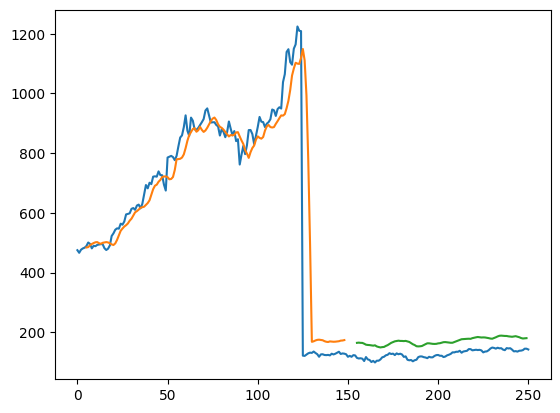

In [116]:
look_back=5
trainPredictPlot = np.empty_like(df_of_data_target_col)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_of_data_target_col)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_of_data_target_col)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_of_data_target_col))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# next 30 days

In [117]:
len(test_data)

101

In [118]:
x_input = test_data[96:].reshape(1,-1)
x_input.shape

(1, 5)

In [119]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [120]:
temp_input

[0.035291295346915566,
 0.03673955343894658,
 0.041075442696070136,
 0.04100436254431403,
 0.03867648757430098]

In [121]:
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<10):

    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.07511448]
6
1 day input [0.03673955 0.04107544 0.04100436 0.03867649 0.07511448]
1 day output [[0.07789145]]
2 day input [0.04107544 0.04100436 0.03867649 0.07511448 0.07789145]
2 day output [[0.0827798]]
3 day input [0.04100436 0.03867649 0.07511448 0.07789145 0.0827798 ]
3 day output [[0.08920626]]
4 day input [0.03867649 0.07511448 0.07789145 0.0827798  0.08920626]
4 day output [[0.09876652]]
5 day input [0.07511448 0.07789145 0.0827798  0.08920626 0.09876652]
5 day output [[0.11242655]]
6 day input [0.07789145 0.0827798  0.08920626 0.09876652 0.11242655]
6 day output [[0.11726683]]
7 day input [0.0827798  0.08920626 0.09876652 0.11242655 0.11726683]
7 day output [[0.12376781]]
8 day input [0.08920626 0.09876652 0.11242655 0.11726683 0.12376781]
8 day output [[0.13137989]]
9 day input [0.09876652 0.11242655 0.11726683 0.12376781 0.13137989]
9 day output [[0.13961008]]
[[0.07511448115110397], [0.07789145410060883], [0.08277980238199234], [0.0892062559723854], [0.0987665206193924],

In [135]:
day_new=np.arange(1,6)
day_pred=np.arange(6,16)

In [136]:
len(df_of_data_target_col)

251

In [138]:
df6 = df_of_data_target_col.tolist()
df6.extend(lst_output)

In [139]:
df6

[[0.3342099885383255],
 [0.32640005686412144],
 [0.3355516264027224],
 [0.3393810695785836],
 [0.34170894454859657],
 [0.34650685479213494],
 [0.35705337230894985],
 [0.35285075833636903],
 [0.3395854250148824],
 [0.3473953566890865],
 [0.3459737536539641],
 [0.34996312717127653],
 [0.3511892597890697],
 [0.3521221867808688],
 [0.3521221867808688],
 [0.3400918710961448],
 [0.33476974473340504],
 [0.33858141787132723],
 [0.34834605371882477],
 [0.37638717358661555],
 [0.3842681854125758],
 [0.3950190583656896],
 [0.399212787319301],
 [0.39821766519471524],
 [0.41307341691174515],
 [0.4101502456707745],
 [0.41951505566464387],
 [0.44069694088796874],
 [0.4421451989799998],
 [0.4440910181343237],
 [0.4573208113799323],
 [0.45958649121715867],
 [0.45437987010102265],
 [0.46712098730330787],
 [0.46986645816488815],
 [0.4587868395099023],
 [0.4721143679641756],
 [0.4999511323956677],
 [0.5281344125669709],
 [0.5182809265297782],
 [0.5349492221165892],
 [0.5308798834285511],
 [0.5530213507005

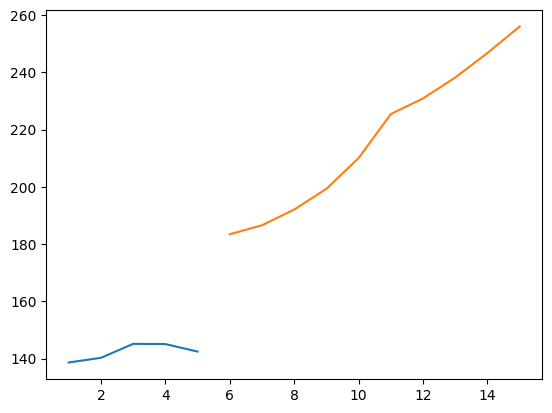

In [140]:
plt.plot(day_new,scaler.inverse_transform(df_of_data_target_col[246:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

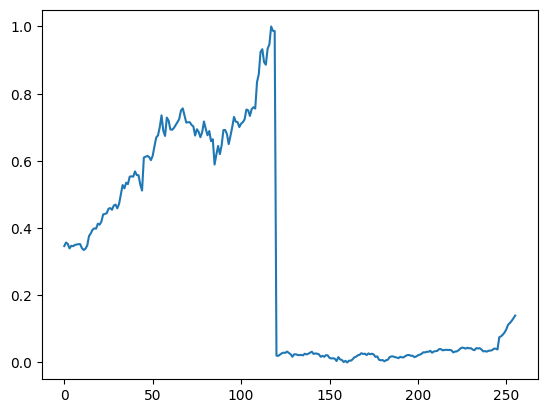

In [141]:
df6 = df_of_data_target_col.tolist()
df6.extend(lst_output)
plt.plot(df6[5:])